<a href="https://colab.research.google.com/github/harshjoshi297/ML-Models-Practice/blob/main/DT_BinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('/content/heart_disease.xlsx',sheet_name='Heart_disease')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [3]:
df['trestbps'].replace(0, np.nan, inplace=True)
df['chol'].replace(0, np.nan, inplace=True)

/tmp/ipython-input-1453736762.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trestbps'].replace(0, np.nan, inplace=True)
/tmp/ipython-input-1453736762.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [15]:
df_cols = df.columns

In [4]:
df['exang'] = df['exang'].replace({
    'TURE': 1,
    'True': 1,
    'FAlSE': 0,
    'FALSE': 0
}).astype(int)

In [5]:
cp_map = {
    'typical angina': 0,
    'atypical angina': 1,
    'non-anginal': 2,
    'asymptomatic': 3
}

df['cp'] = df['cp'].map(cp_map)

In [6]:
df['sex'] = df['sex'].replace({'Male': 1, 'Female': 0})

/tmp/ipython-input-4076680231.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({'Male': 1, 'Female': 0})


In [7]:
df['fbs'] = df['fbs'].replace({'True': 1, 'False': 0})

In [8]:
restecg_map = {
    'lv hypertrophy': 0,
    'normal': 1,
    'st-t abnormality': 2
}

df['restecg'] = df['restecg'].map(restecg_map)

In [9]:
slope_map = {
    'downsloping': 0,
    'flat': 1,
    'upsloping': 2
}

df['slope'] = df['slope'].map(slope_map)

In [10]:
thal_map = {
    'normal': 0,
    'fixed defect': 1,
    'reversable defect': 2
}

df['thal'] = df['thal'].map(thal_map)

In [11]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,1
chol,172
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [12]:
y = df['num'].apply(lambda x: 0 if x==0 else 1)


In [13]:
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)
display(df['num'].value_counts())

,count
num,
1,509
0,399


In [16]:
for i in df_cols:
  print(i,df[i].unique())

age [63 41 57 52 66 56 48 53 30 54 37 46 68 76 58 42 64 71 69 45 44 39 62 50
 55 49 43 51 36 59 61 60 67 70 47 65 38 34 35 29 74 75 40 72 31 73 33 32
 77]
sex [1 0]
cp [0 1 3 2]
trestbps [145. 135. 140. 118. 110. 160. 130. 155. 170. 150. 125. 120. 142. 100.
 102. 112. 146. 138. 134. 122. 136. 108. 115. 104. 128. 106. 156. 129.
 124. 126. 132. 105. 152. 148.  94. 180. 178. 101. 172.  80. 114. 190.
 113. 154. 175. 133. 131. 181. 188. 193. 153. 179. 143.  90.  96. 163.
 161. 196. 107. 167. 174. 158. 192. 185. 144. 169.  95.  92. 200. 127.
 121. 166. 177. 165. 117. 116. 184.  97. 186. 164. 123. 151.  nan 137.
 182.]
chol [233. 203. 192. 186. 201. 228. 276. 211. 260. 175. 237. 226. 273. 197.
 240. 250. 177. 248. 265. 303. 149. 234. 160. 264. 242. 302. 278. 220.
 294. 394. 214. 219. 271. 213. 245. 196. 209. 141. 340. 318. 243. 238.
 222. 208. 236. 178. 275. 308. 223. 204. 269. 256. 180. 360. 239. 235.
 262. 257. 295. 417. 212. 254. 283. 244. 315. 306. 342. 267. 198. 215.
 304. 247. 266. 252.

# Model Building - Binary

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

In [18]:
X = df.drop('num', axis=1)
y = df['num']   # multi-class target

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [19]:
median_impute_cols = ['trestbps', 'chol', 'oldpeak']

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ('median_imputer', SimpleImputer(strategy='median'), median_impute_cols)
    ],
    remainder='passthrough'
)

In [21]:
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', DecisionTreeClassifier(
        criterion='gini',
        max_depth=8,
        min_samples_split=10,
        random_state=42
    ))
])

In [22]:
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('median_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['trestbps', 'chol',
                                                   'oldpeak'])])),
                ('model',
                 DecisionTreeClassifier(max_depth=8, min_samples_split=10,
                                        random_state=42))])

In [23]:
y_pred = pipeline.predict(X_test)

In [24]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall   :", recall_score(y_test, y_pred, average='macro'))
print("F1-score :", f1_score(y_test, y_pred, average='macro'))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy : 0.7582417582417582
Precision: 0.7552135054617677
Recall   : 0.7519607843137255
F1-score : 0.7532051282051282

Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.70      0.72        80
           1       0.77      0.80      0.79       102

    accuracy                           0.76       182
   macro avg       0.76      0.75      0.75       182
weighted avg       0.76      0.76      0.76       182



In [25]:
param_grid = {
    'model__max_depth': [3, 4, 5, 6, 7, None],
    'model__min_samples_split': [2, 5, 10, 15],
    'model__criterion': ['gini', 'entropy'],
    'model__class_weight': [None, 'balanced']
}

In [26]:
from sklearn.metrics import make_scorer, f1_score
f1_macro_scorer = make_scorer(f1_score, average='macro')

In [27]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=f1_macro_scorer,
    cv=5,          # 5-fold cross-validation
    n_jobs=-1,
    verbose=1
)


In [28]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('median_imputer',
                                                                         SimpleImputer(strategy='median'),
                                                                         ['trestbps',
                                                                          'chol',
                                                                          'oldpeak'])])),
                                       ('model',
                                        DecisionTreeClassifier(max_depth=8,
                                                               min_samples_split=10,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'model__class_weight': [None, 'balanced'],
                         'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [3, 4, 5, 6, 7, None],
                         'model__min_samples_split': [2, 5, 10, 15]},
             scoring=make_scorer(f1_score, response_method='predict', average=macro),
             verbose=1)

In [29]:
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

Best Parameters: {'model__class_weight': None, 'model__criterion': 'entropy', 'model__max_depth': 4, 'model__min_samples_split': 2}
Best F1 Score: 0.7731345013371657


In [30]:
y_pred = grid_search.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score

print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy on Test Set: 0.7307692307692307

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.70      0.70        80
           1       0.76      0.75      0.76       102

    accuracy                           0.73       182
   macro avg       0.73      0.73      0.73       182
weighted avg       0.73      0.73      0.73       182



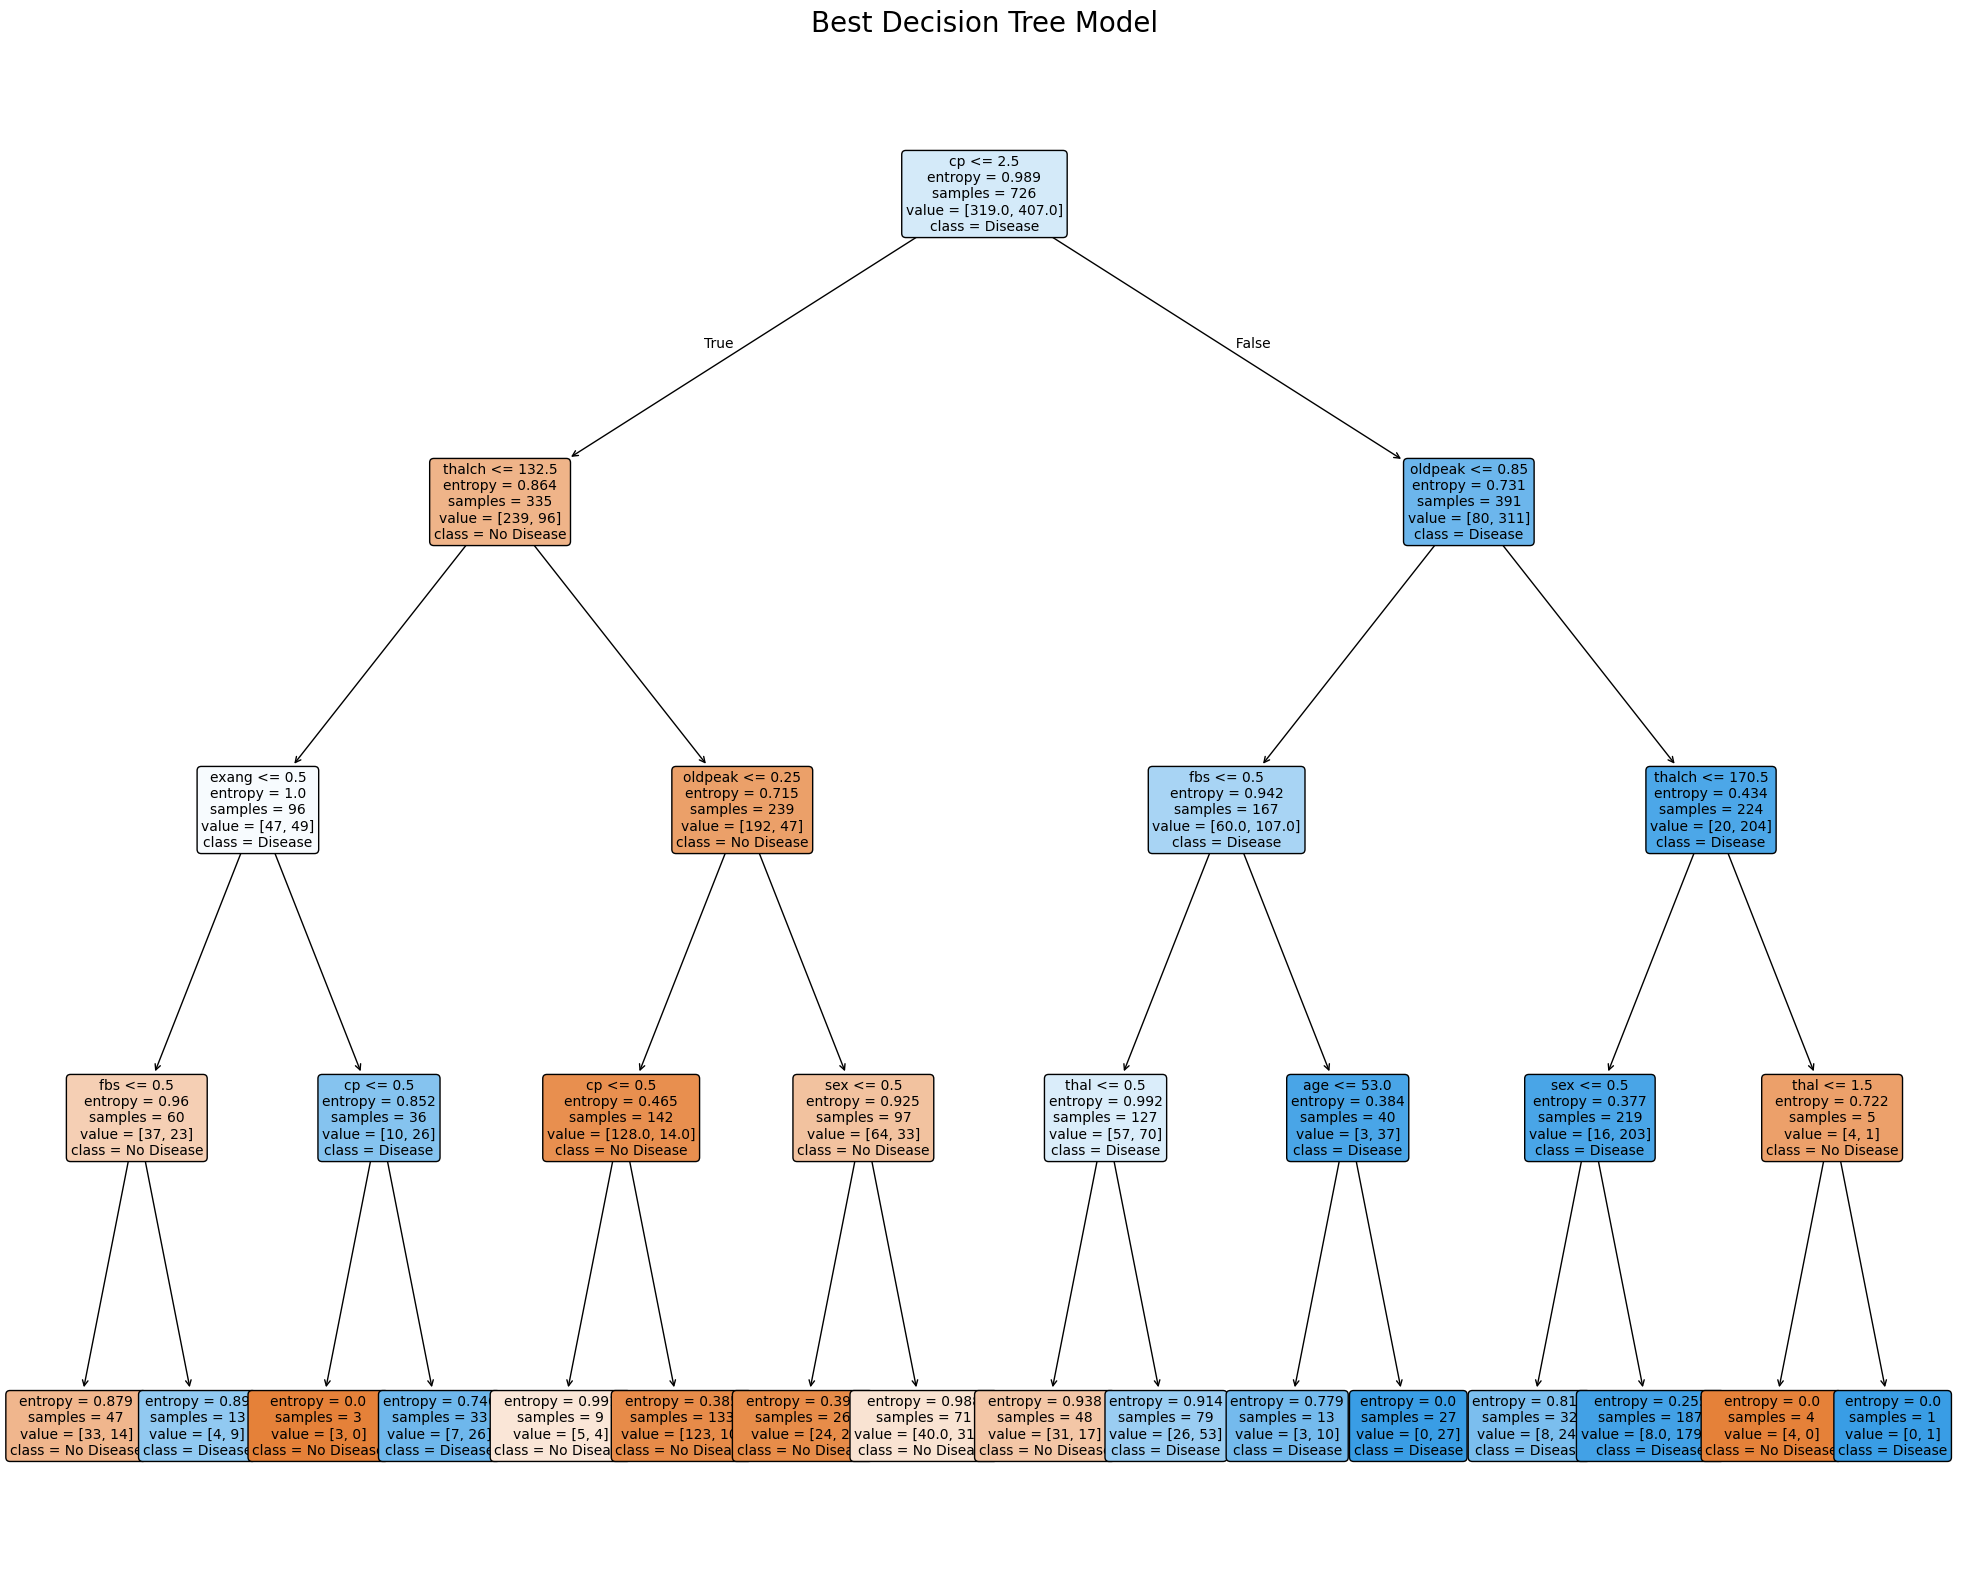

In [31]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Get the best estimator from GridSearchCV
best_pipeline = grid_search.best_estimator_

# Access the Decision Tree model from the pipeline
best_tree_model = best_pipeline.named_steps['model']

# Get feature names after preprocessing
# We need to consider how ColumnTransformer handles feature names
# If remainder='passthrough', original column names for non-transformed features are preserved
# For transformed features (median_imputer), they retain their original names

# Get the names of columns that were imputed
imputed_features = best_pipeline.named_steps['preprocessing'].transformers_[0][2]

# Get the names of the columns that passed through (remainder)
# This is a bit tricky with remainder='passthrough' as it just uses indices by default
# For simplicity, we'll assume the order of features is maintained after imputation
# and then original order of X_train for remainder.

# Create a list of all feature names in the order they are processed by the pipeline
# The preprocessor puts the imputed columns first, then the remainder columns

# First, the imputed columns (they keep their names)
processed_feature_names = list(imputed_features)

# Then, the remainder columns. We need to get the original column names from X_train
# excluding those that were imputed.
# Get all column names from X_train
all_X_train_cols = X_train.columns.tolist()

# Identify columns that were NOT imputed (these are the 'remainder' columns)
remainder_features = [col for col in all_X_train_cols if col not in imputed_features]

# Add remainder features to the processed_feature_names list
processed_feature_names.extend(remainder_features)

# Get class names (assuming 0 and 1 for the binary classification)
class_names = ['No Disease', 'Disease']

plt.figure(figsize=(25, 20))
plot_tree(best_tree_model,
          feature_names=processed_feature_names,
          class_names=class_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Best Decision Tree Model', fontsize=20)
plt.show()